In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.optim import Adam

from utils import CustomResNet
from utils import CustomResNetDropBlock
from utils import CustomResNetStoDepth
from utils import fashionmnist_dataloader
from utils import train_cutmix
from utils import val

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
np.random.seed(0)

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device

device(type='cuda')

In [ ]:
train_loader, val_loader, test_loader = fashionmnist_dataloader(batch_size=50, basic_aug=False)

100%|██████████| 26421880/26421880 [00:02<00:00, 9857226.52it/s] 


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 209162.44it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3910847.50it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10047592.83it/s]
/opt/conda/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 26421880/26421880 [00:02<00:00, 11509743.95it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 210545.54it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3893915.84it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10209114.42it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
num_classes = 10
num_epochs=10
criterion = nn.CrossEntropyLoss()
patience = 3

all_model_results = []
p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# Perform Hyperparameter tuning of p for CustomResNetDropBlock
for p in p_values:
    print(f"Training with p={p}\n")
    model_dropblock = CustomResNetDropBlock(num_classes, p, 7).to(device)
    optimizer = Adam(model_dropblock.parameters(), lr=3e-4)

    validation_accuracies = []
    best_val_acc = float('-inf')
    current_patience = 0

    for epoch in range(1, num_epochs + 1):
        train_cutmix(model_dropblock, criterion, train_loader, optimizer, epoch, alpha=2.5, device=device)
        val_acc, avg_loss = val(model_dropblock, criterion, val_loader, device)
        validation_accuracies.append(val_acc)
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            current_patience = 0
        else:
            current_patience += 1

        if current_patience >= patience:
            print(f'Early stopping: No improvement for {patience} epochs.')
            break
    # Store the results for this model configuration
    model_results = {
        "p": p,
        "validation_accuracies": validation_accuracies
    }

    # Append the results to the list of all model results
    all_model_results.append(model_results)

Training with p=0.1



/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 221MB/s]


Train Epoch: 1	Average Loss: 0.705863	Accuracy: 74.82%
Val Loss: 0.3949, Val Accuracy: 85.92%
Train Epoch: 2	Average Loss: 0.498870	Accuracy: 82.10%
Val Loss: 0.3038, Val Accuracy: 88.45%
Train Epoch: 3	Average Loss: 0.450116	Accuracy: 83.85%
Val Loss: 0.2792, Val Accuracy: 90.15%
Train Epoch: 4	Average Loss: 0.417849	Accuracy: 85.18%
Val Loss: 0.2495, Val Accuracy: 91.13%
Train Epoch: 5	Average Loss: 0.390423	Accuracy: 85.96%
Val Loss: 0.2345, Val Accuracy: 91.66%
Train Epoch: 6	Average Loss: 0.373693	Accuracy: 86.81%
Val Loss: 0.2454, Val Accuracy: 91.22%
Train Epoch: 7	Average Loss: 0.348456	Accuracy: 87.42%
Val Loss: 0.2264, Val Accuracy: 92.14%
Train Epoch: 8	Average Loss: 0.335643	Accuracy: 88.01%
Val Loss: 0.2220, Val Accuracy: 92.27%
Train Epoch: 9	Average Loss: 0.318063	Accuracy: 88.62%
Val Loss: 0.2065, Val Accuracy: 92.84%
Train Epoch: 10	Average Loss: 0.304391	Accuracy: 89.16%
Val Loss: 0.1978, Val Accuracy: 93.07%
Training with p=0.2

Train Epoch: 1	Average Loss: 0.728414	

In [ ]:
best_p_db = -1
best_acc = -1
for model_results in all_model_results:
    acc = model_results["validation_accuracies"]
    acc_avg = sum(acc)/len(acc)
    if acc_avg > best_acc:
        best_acc = acc_avg
        best_p_db = model_results["p"]
print(f"Best value of p for DropBlock: {best_p_db}")
print(f"Best accuracy (Average): {best_acc}")

Best value of p for DropBlock: 0.1
Best accuracy (Average): 90.88499999999999


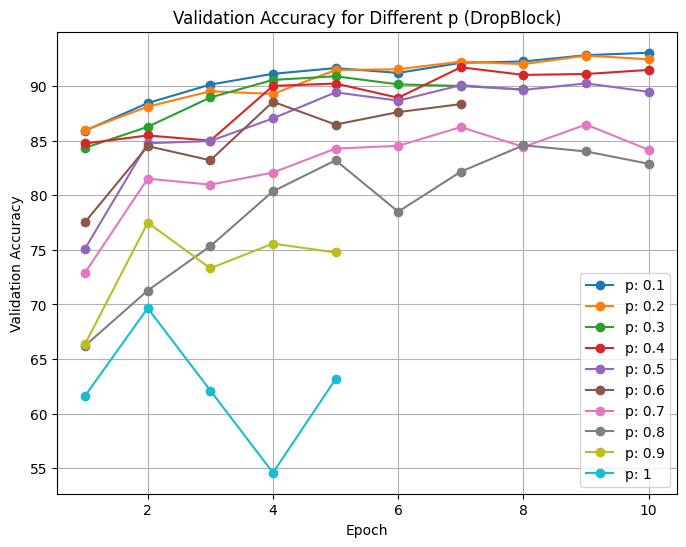

In [ ]:
# Create a single figure to hold the plot
plt.figure(figsize=(8, 6))

# Loop through the results for different model configurations
for result in all_model_results:
    p = result["p"]
    validation_accuracies = result["validation_accuracies"]

    # Plot the validation accuracies for this model configuration
    plt.plot(range(1, len(validation_accuracies) + 1), validation_accuracies, marker='o', label=f'p: {p}')

# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different p (DropBlock)')
plt.legend(loc='best')
plt.grid()

# Show the single graph with all the data
plt.show()


In [ ]:
num_classes = 10
criterion = nn.CrossEntropyLoss()
num_epochs=10
patience = 3

all_model_results = []
p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# Perform Hyperparameter tuning of p for CustomResNetStoDepth
for p in p_values:
    print(f"Training with p={p}\n")
    model_stodepth = CustomResNetStoDepth(num_classes, p, "batch").to(device)
    optimizer = Adam(model_stodepth.parameters(), lr=3e-4)

    validation_accuracies = []
    best_val_acc = float('-inf')
    current_patience = 0

    for epoch in range(1, num_epochs + 1):
        train_cutmix(model_stodepth, criterion, train_loader, optimizer, epoch, alpha=2.5, device=device)
        val_acc, avg_loss = val(model_stodepth, criterion, val_loader, device=device)
        validation_accuracies.append(val_acc)
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            current_patience = 0
        else:
            current_patience += 1

        if current_patience >= patience:
            print(f'Early stopping: No improvement for {patience} epochs.')
            break
    # Store the results for this model configuration
    model_results = {
        "p": p,
        "validation_accuracies": validation_accuracies
    }

    # Append the results to the list of all model results
    all_model_results.append(model_results)

Training with p=0.1

Train Epoch: 1	Average Loss: 0.798025	Accuracy: 71.85%
Val Loss: 1.1129, Val Accuracy: 74.67%
Train Epoch: 2	Average Loss: 0.563070	Accuracy: 80.31%
Val Loss: 0.8132, Val Accuracy: 79.28%
Train Epoch: 3	Average Loss: 0.494523	Accuracy: 82.58%
Val Loss: 1.0834, Val Accuracy: 76.13%
Train Epoch: 4	Average Loss: 0.463258	Accuracy: 83.91%
Val Loss: 0.8618, Val Accuracy: 78.24%
Train Epoch: 5	Average Loss: 0.425808	Accuracy: 84.84%
Val Loss: 0.6872, Val Accuracy: 80.53%
Train Epoch: 6	Average Loss: 0.410303	Accuracy: 85.64%
Val Loss: 0.9945, Val Accuracy: 76.42%
Train Epoch: 7	Average Loss: 0.391247	Accuracy: 86.17%
Val Loss: 0.7210, Val Accuracy: 82.62%
Train Epoch: 8	Average Loss: 0.373353	Accuracy: 86.79%
Val Loss: 0.5904, Val Accuracy: 82.68%
Train Epoch: 9	Average Loss: 0.357442	Accuracy: 87.43%
Val Loss: 0.7745, Val Accuracy: 78.20%
Train Epoch: 10	Average Loss: 0.343936	Accuracy: 87.75%
Val Loss: 0.4926, Val Accuracy: 84.53%
Training with p=0.2

Train Epoch: 1	Av

In [ ]:
best_p_sd = -1
best_acc = -1
for model_results in all_model_results:
    acc = model_results["validation_accuracies"]
    acc_avg = sum(acc)/len(acc)
    if acc_avg > best_acc:
        best_acc = acc_avg
        best_p_sd = model_results["p"]
print(f"Best value of p for Stochastic Depth: {best_p_sd}")
print(f"Best accuracy (Average): {best_acc}")

Best value of p for Stochastic Depth: 0.1
Best accuracy (Average): 79.33083333333333


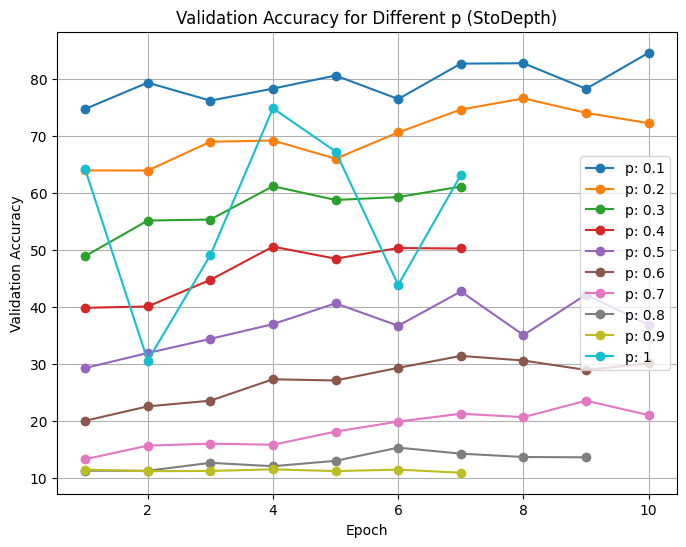

In [ ]:
# Create a single figure to hold the plot
plt.figure(figsize=(8, 6))

# Loop through the results for different model configurations
for result in all_model_results:
    p = result["p"]
    validation_accuracies = result["validation_accuracies"]

    # Plot the validation accuracies for this model configuration
    plt.plot(range(1, len(validation_accuracies) + 1), validation_accuracies, marker='o', label=f'p: {p}')

# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different p (StoDepth)')
plt.legend(loc='best')
plt.grid()

# Show the single graph with all the data
plt.show()
